 # 1 Cargar el dataset

In [1]:
# Manipulacion de datos
import pandas as pd
import numpy as np

# Librerias para realizar ditintos tipos de diagramas
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

import mitosheet


In [2]:
# Dataset sin procesar de Peliculas y shows
#df_raw_movies = pd.read_csv("Data Netflix Tv/raw_titles.csv")

# Dataset de mejores peliculas y shows de Netflix por año
#df_best_movies_by_year = pd.read_csv("Data Netflix Tv/Best Movie by Year Netflix.csv")
#df_best_shows_by_year = pd.read_csv("Data Netflix Tv/Best Show by Year Netflix.csv")


# Dataset de mejores peliculas y shows de Netflix
df_best_movies_netflix = pd.read_csv("Data_Netflix/Best Movies Netflix.csv")
df_best_shows_netflix = pd.read_csv("Data_Netflix/Best Shows Netflix.csv")




In [3]:
# tipos de datos de las columnas
df_best_movies_netflix.dtypes

index                int64
TITLE               object
RELEASE_YEAR         int64
SCORE              float64
NUMBER_OF_VOTES      int64
DURATION             int64
MAIN_GENRE          object
MAIN_PRODUCTION     object
dtype: object

In [4]:
# Verficamos que no exitan datos nulos en las columnas.
df_best_movies_netflix.isnull().any()

index              False
TITLE              False
RELEASE_YEAR       False
SCORE              False
NUMBER_OF_VOTES    False
DURATION           False
MAIN_GENRE         False
MAIN_PRODUCTION    False
dtype: bool

In [5]:
# Ordenar por columnas
df_best_movies_netflix.sort_values(
                        by=['NUMBER_OF_VOTES', 'SCORE' ],
                        ascending=False,
                        inplace=True )

Borrar columna 'index'

In [6]:
df_best_movies_netflix.drop('index', axis=1, inplace=True)

In [7]:
# Mostra inforamcion preeliminar del dataset.
df_best_movies_netflix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387 entries, 1 to 311
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TITLE            387 non-null    object 
 1   RELEASE_YEAR     387 non-null    int64  
 2   SCORE            387 non-null    float64
 3   NUMBER_OF_VOTES  387 non-null    int64  
 4   DURATION         387 non-null    int64  
 5   MAIN_GENRE       387 non-null    object 
 6   MAIN_PRODUCTION  387 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 24.2+ KB


# 2 Data visualization

## Hipotesis
1. [x] ¿Cuáles son los generos más populares?
2. [x] ¿Cuál es el título de la película más votada en el dataset?
3. [x] ¿Cuál es la película más larga del dataset en términos de duración?
4. [x] ¿Cuáles son las películas con una puntuación de 8.5 o más en el dataset?
5. [x] ¿Cuáles son las películas producidas por la compañía de producción principal "Main Production"?
6. [x] ¿Cuáles son las películas del género principal "Comedia" en el dataset y su puntuacion?
7. [x] ¿Cuál es la película más recientemente lanzada en el dataset?
8. [x] ¿Cuáles son las películas con un numero de votos de 500.000 hasta 1.000.000 ?
9. [x]  ¿Cuál ha sido la película más votada en cada género principal en cada año desde el año de lanzamiento hasta la actualidad?
10. [x] ¿Cuál ha sido el género principal más popular en cada año desde el año de lanzamiento hasta la actualidad en función del número de votos recibidos?
11. [x] ¿Cuáles han sido las producciones principales con el mayor número de películas lanzadas en cada género principal en cada año desde el año de      lanzamiento hasta la actualidad?  
12.  [x]  ¿Cuál ha sido la producción principal más exitosa en términos de puntuación media en cada género principal?
13.  [x]  ¿Cuál ha sido el título de la película con la puntuación más alta en cada año desde el año de lanzamiento hasta la actualidad?
14.  [x]  ¿Hay alguna relación entre el año de lanzamiento y la puntuación de la película en función del número de votos recibidos?


In [8]:
df_best_movies_netflix

,TITLE,RELEASE_YEAR,SCORE,NUMBER_OF_VOTES,DURATION,MAIN_GENRE,MAIN_PRODUCTION
1,Inception,2010,8.8,2268288,148,scifi,GB
2,Forrest Gump,1994,8.8,1994599,142,drama,US
6,Django Unchained,2012,8.4,1472668,165,western,US
5,Saving Private Ryan,1998,8.6,1346020,169,drama,US
16,Taxi Driver,1976,8.3,795222,113,crime,US
...,...,...,...,...,...,...,...
219,Bully,2011,7.4,10266,92,drama,US
122,Berserk: The Golden Age Arc II - The Battle fo...,2012,7.7,10257,80,fantasy,JP
150,Gifted Hands: The Ben Carson Story,2009,7.6,10210,86,drama,US
320,Luck by Chance,2009,7.1,10206,155,romance,IN


## 2.1 Generos más populares.
Los generos más papulares son todos aquellos que tinen más apariciónes

Crearemos una funcion para hacer **anotaciones** en las barras del los graficos, nos ahorra muchas lineas de codigo.

In [159]:
def annot_bar(ax:pd.DataFrame, orient:dict[str:int]=None, fontsize:int=10):
    """Helps to add annotations to bar charts, on the Vertical and Horizontal axes.

    Parameters:
    
      orient (dict[str:int], optional): The axis of the annotations. If not specified, the default value is None.
        1: Vertical.
        0: Horizontal.
        
      ax (pd.DataFrame): Bars of the chart.

    Example:
        >>> import seaborn as sns
        >>> ax = sns.barplot(x=[1, 2, 3], y=[10, 20, 30])
        >>> annot_bar(graphic=ax, orient={'texto': 1})
    """

       
    try:
        
        # Anotaciones de tipo STR
        if "texto" in orient:
             # Annotations on the Vertical axis '|'
            if orient["texto"]  == 1:
                # We iterate over each bar
                for p in ax.patches:
                    ax.text(
                        p.get_x() + p.get_width() / 2.,
                        p.get_height(),
                        '%d' % int(p.get_height()),
                        fontsize=fontsize,
                        color='black',
                        ha='center',
                        va='bottom',
                    );

            # Annotations on the Horizontal axis '__'
            elif orient["texto"] == 0:
                # We iterate over each bar
                for p in ax.patches:
                    ax.text(
                        p.get_width(),
                        p.get_y() + p.get_height() / 2.,
                        '%d' % int(p.get_width()),
                        fontsize=fontsize,
                        color='black',
                        ha='left',
                        va='center',
                    );


        # Anotaciones de tipo FLOAT
        elif "numerico" in orient:
             # Annotations on the Vertical axis '|'
            if orient["numerico"] == 1:
                # We iterate over each bar
                for p in ax.patches:
                    ax.text(
                        p.get_x() + p.get_width() / 2.,
                        p.get_height(),
                        p.get_height(),
                        fontsize=fontsize,
                        color='black',
                        ha='center',
                        va='bottom',
                    );

            # Annotations on the Horizontal axis '__'
            elif orient["numerico"]  == 0:
                # We iterate over each bar
                for p in ax.patches:
                    ax.text(
                        p.get_width(),
                        p.get_y() + p.get_height() / 2.,
                        p.get_width(),
                        fontsize=fontsize,
                        color='black',
                        ha='left',
                        va='center',
                    );
    except Exception as e:
        pass
        
    # We return all the bars with their annotation
    return ax


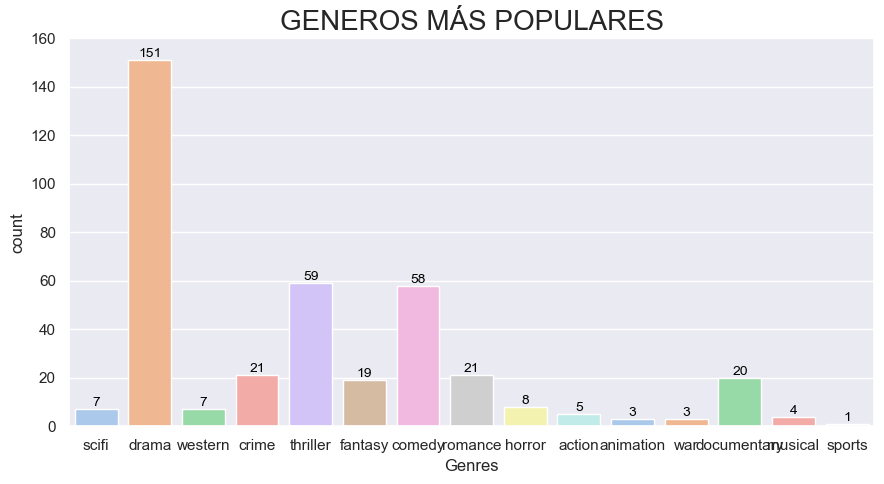

In [161]:
# Definimos una figura y un Axes para graficar.
fig, ax = plt.subplots(figsize=(9, 5), tight_layout=True)

# Grafico categorico de barras.
plot = sns.countplot(data=df_best_movies_netflix, x="MAIN_GENRE", ax=ax, palette="pastel"); 


# funicon de anotaciones. 
annot_bar(ax = plot, orient = {"texto": 1});

# Agregar titulo
ax.set_title(label="GENEROS MÁS POPULARES", fontdict= dict(fontsize=20, verticalalignment = 'baseline' ) );

# Nuevos nombre del eje X
ax.set_xlabel("Genres", fontsize=12)

# agregar limite al eje Y
plt.ylim(0, 160);

plt.savefig("grafico.png")

>  Puede observar que el genero más popular es el de **'drama'**. Eso quiere decir que existen **151 peliculas que pertecen a ese genero**

##  2.2 ¿Cuál es el título de la película más votada en el dataset?

In [11]:
# Eleginmos las 5 peliculas con más puntuacion
top_movies = df_best_movies_netflix.loc[:, ["TITLE", "NUMBER_OF_VOTES", "RELEASE_YEAR"] ].head(5)
top_movies

,TITLE,NUMBER_OF_VOTES,RELEASE_YEAR
1,Inception,2268288,2010
2,Forrest Gump,1994599,1994
6,Django Unchained,1472668,2012
5,Saving Private Ryan,1346020,1998
16,Taxi Driver,795222,1976


Creación de graficos y personalización

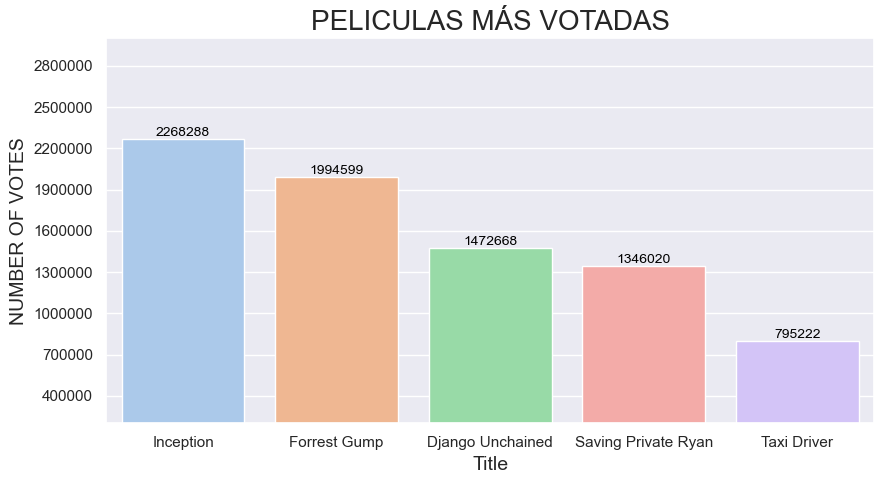

In [162]:
# Personalizar tamaño del Axes
fig, ax = plt.subplots(figsize=(9, 5), tight_layout=True)

# Grafico de categorico
plot = sns.barplot(
    
    data = top_movies, 
    y = "NUMBER_OF_VOTES",
    x = "TITLE",
    palette="pastel");



# Establecer las marcas y etiquetas del eje Y
yticks = np.arange(100000, 3000000, 300000)
yticklabels = ['{}'.format(ytick) for ytick in yticks]

# Agrgando los t
plot.set_yticks(yticks )
plot.set_yticklabels(yticklabels);


# Establecer un limite del eje Y
plot.set_ylim(200000, 3000000);


# Agregar notas a cada barra del grafico
annot_bar(plot, {"texto": 1});

# Agregar titulo
plot.set_title("PELICULAS MÁS VOTADAS", fontsize = 20);


# Personalizar etiqueta del eje Y
plt.ylabel("NUMBER OF VOTES", fontsize = 14);

# Personalizar eqtiqueta del eje X
plt.xlabel("Title", fontsize = 14);


> **Inception** es la Pelicula más votada

## 2.3 ¿Cuál es la película más larga del dataset en términos de duración?

In [13]:
# Peliculas con una duracion mayor a 200
top_duration_movies = df_best_movies_netflix.query(expr="DURATION > 200")

# Agrupar los datos por título de película y calcular la duración media para cada película
top_duration_movies = top_duration_movies.groupby('TITLE')['DURATION'].mean()
top_duration_movies

TITLE
Hum Aapke Hain Koun..!               206.0
Jodhaa Akbar                         213.0
Kabhi Khushi Kabhie Gham             210.0
Lagaan: Once Upon a Time in India    224.0
Once Upon a Time in America          229.0
The Irishman                         209.0
Name: DURATION, dtype: float64

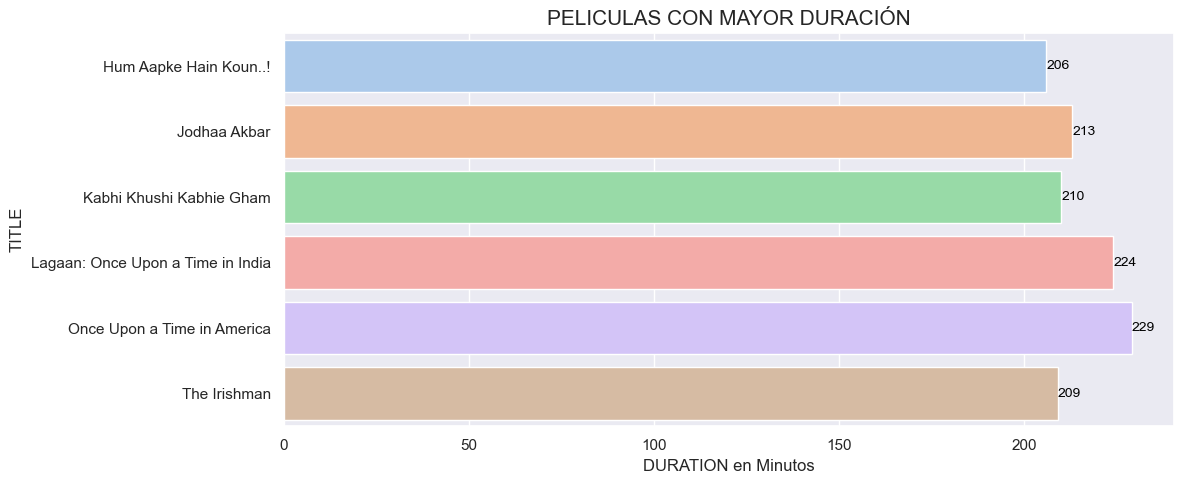

In [163]:
# Perzonalizar el el tamaño del axes con Matplolib
fig, ax = plt.subplots(figsize=(12, 5), tight_layout=True)

# Crear grafico de barra con Seaborn
ax = sns.barplot( 
    y = top_duration_movies.index,
    x = top_duration_movies.values,
    palette="pastel",
    ax = ax
           );


# Agrgramos el tiempo de duracion de la pelicula a cada barra.
annot_bar(ax, {"texto":0});


# Agregar titullo y label en el eje X
ax.set_title("PELICULAS CON MAYOR DURACIÓN", fontsize=15);

plt.xlabel("DURATION en Minutos");


> La pelicula con mayor duracion en el dataset es **Once Upon a Time in America**

## 2.4 ¿Cuáles son las películas con una puntuación de 8.5 o más en el dataset?

Películas con **puntuacíon igual o mayor a 8**

In [15]:
# Realizar query donde la puntuación sea mayor a 8.
scores_greater_than_8 = df_best_movies_netflix[["TITLE", "SCORE"]].query(expr="SCORE >= 8.5")

# Organizar las puntuaciónes de mayor a menor 
scores_greater_than_8.sort_values(by="SCORE", ascending=True, inplace=True)
scores_greater_than_8



,TITLE,SCORE
5,Saving Private Ryan,8.6
4,Bo Burnham: Inside,8.7
3,Anbe Sivam,8.7
1,Inception,8.8
2,Forrest Gump,8.8
0,David Attenborough: A Life on Our Planet,9.0


Realizar **grafico de de barras barplot()**, para representar las pelicuas con **puntaje mayor o igual a 8.5**

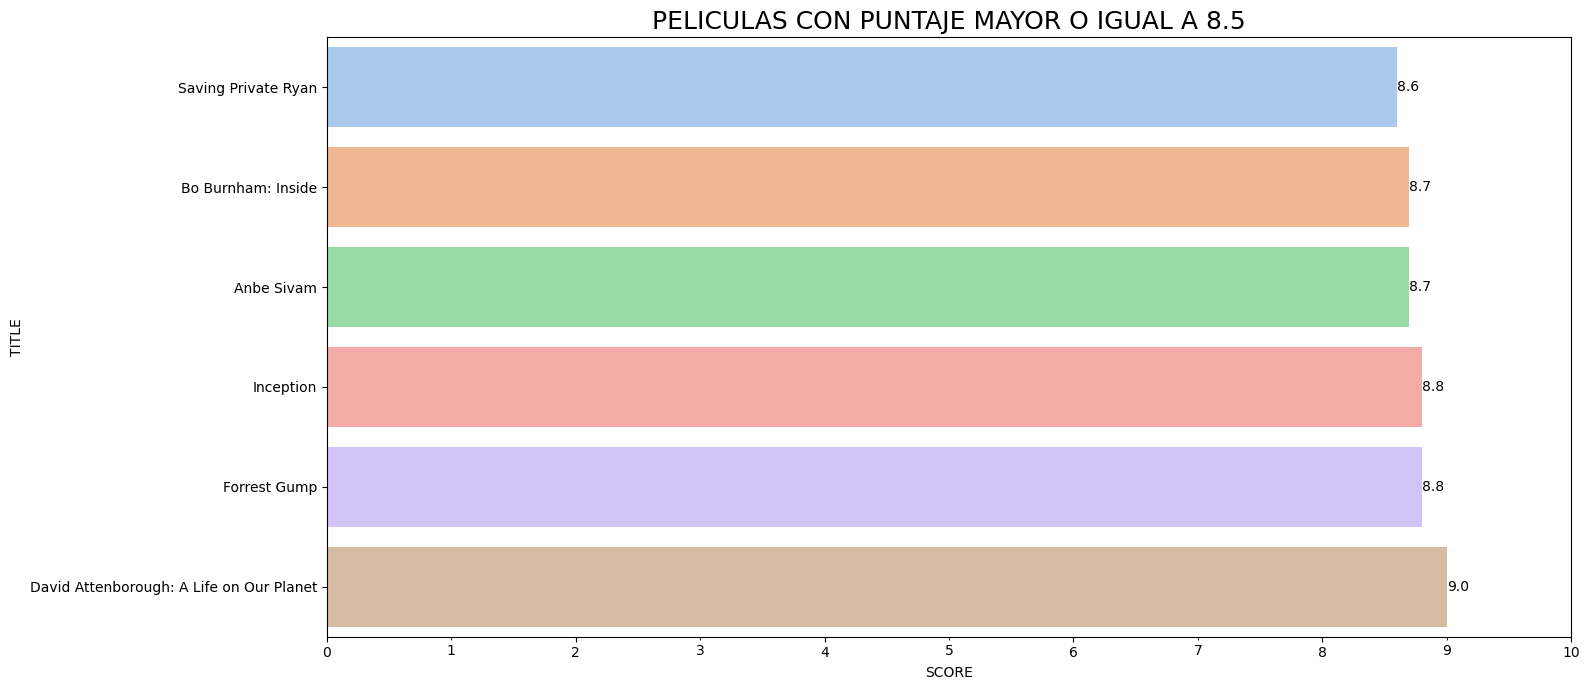

In [16]:
# Perzonalizar el el tamaño del axes con Matplolib
fig, ax = plt.subplots(figsize=(16, 7), tight_layout=True)


plot = sns.barplot(
    
    data = scores_greater_than_8,
    y = "TITLE",
    x = "SCORE",
    palette="pastel",
    ax = ax);


# Agregar anotacion
annot_bar(plot, orient = {"numerico":0})


# Agregar un rango de etiquetas en el eje X
plot.set_xticks(np.arange(0, 11), np.arange(0, 11), minor=True,  );


# Agregar titulos
plt.title("PELICULAS CON PUNTAJE MAYOR O IGUAL A 8.5", fontsize = 18);

> La pelicual con el puntaje más alto es **David Attenborough: A Life on Our Planet**

## 2.5 ¿Cuáles son las películas producidas por la compañía de producción principal "Main Production"?

In [17]:
def grafico_barplot(df:pd.DataFrame, x:str, y:str, x_lenght:int=10, y_height:int=8, title:str="Titulo", hue:str=None, orient:str=None, width:int=0.5):
    
    """
    La función grafico_barplot es una función que permite crear un gráfico de barras con la librería Seaborn a partir de un dataframe de Pandas.
    
    
    Los parámetros de la función son:

        df: Un dataframe de Pandas que contiene los datos a graficar.
        x: Nombre de la columna del dataframe que se utilizará como eje x.
        y: Nombre de la columna del dataframe que se utilizará como eje y.
        x_lenght: Ancho del gráfico en pulgadas. Valor por defecto: 10.
        y_height: Alto del gráfico en pulgadas. Valor por defecto: 8.
        title: Título del gráfico. Valor por defecto: "Título".
        La función crea un gráfico de barras con Seaborn, le asigna un título y devuelve el objeto Seaborn que representa el gráfico.
    
    
    """
    
    # Perzonalizar el el tamaño del axes con Matplolib
    fig, axs = plt.subplots(figsize=(x_lenght, y_height), tight_layout=True)

    
    # Crear grafico de barras con Seaborn
    plot = sns.barplot(
        data = df,
        y = y,
        x = x,
        palette="husl",
        ax = axs,
        hue=hue,
        orient=orient,
        width = width
    );

    
    # Agregar titulos
    plot.set_title(title, fontsize = 18);
    
    return plot

In [18]:
# Diccionario de paises segun la abreviatura del dataset
countries = {'GB': 'United Kingdom', 'US': 'United States', 'DE': 'Germany', 'CA': 'Canada', 'NO': 'Norway', 'NZ': 'New Zealand', 'IN': 'India', 'JP': 'Japan', 'FR': 'France', 'HK': 'Hong Kong', 'ES': 'Spain', 'MX': 'Mexico', 'AU': 'Australia', 'KR': 'South Korea', 'CN': 'China', 'BE': 'Belgium', 'TR': 'Turkey', 'ZA': 'South Africa', 'HU': 'Hungary', 'PL': 'Poland', 'IE': 'Ireland', 'MW': 'Malawi', 'IT': 'Italy', 'LT': 'Lithuania', 'ID': 'Indonesia', 'DK': 'Denmark', 'XX': 'Unknown', 'TH': 'Thailand', 'KH': 'Cambodia', 'UA': 'Ukraine', 'BR': 'Brazil', 'PS': 'Palestine', 'NL': 'Netherlands', 'AR': 'Argentina', 'CD': 'Congo, Democratic Republic of the'}


# Creamos un DataFrame 
df_production_country = pd.DataFrame( 
    {
        "Country":df_best_movies_netflix["MAIN_PRODUCTION"].value_counts().index, 
        "Number of Production": df_best_movies_netflix["MAIN_PRODUCTION"].value_counts().values
    } 
)


# Mostaramos las 3 pirmeas filas del Dataframe
df_production_country.head(3)

,Country,Number of Production
0,US,157
1,IN,115
2,GB,29


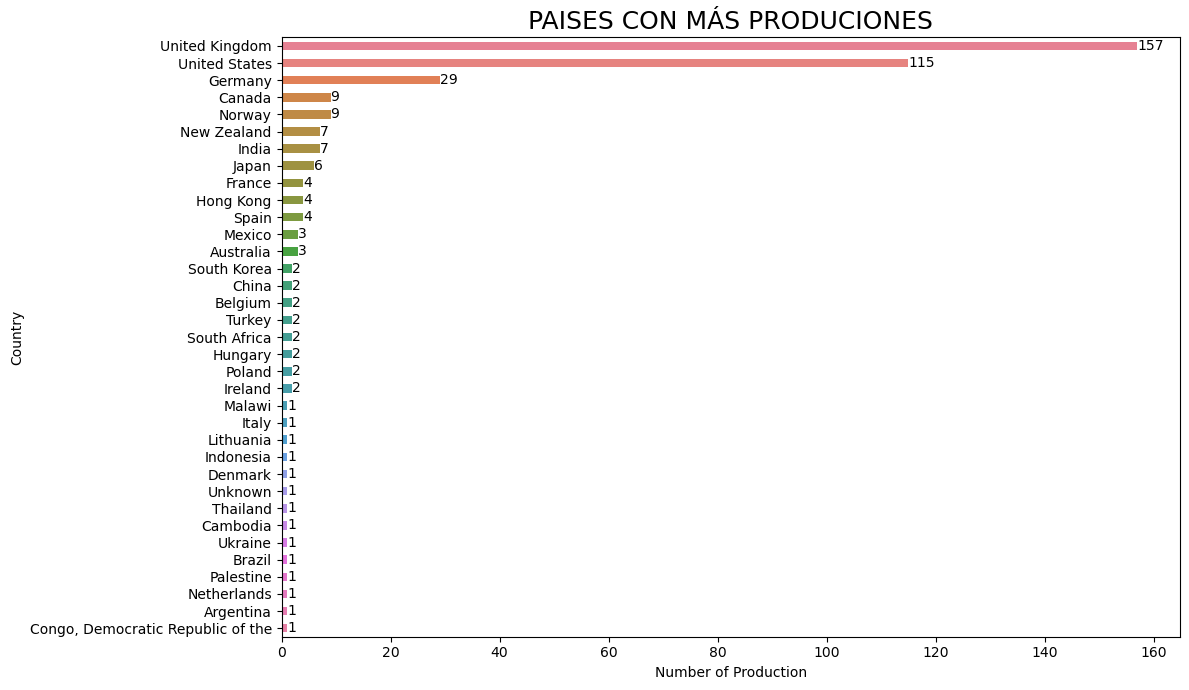

In [19]:
# Creamos grafico de barra con la funcion 'grafico_barplot()'
graphic = grafico_barplot(df=df_production_country, y="Country", x="Number of Production", title="PAISES CON MÁS PRODUCIONES", x_lenght = 12, y_height = 7);

# Cambiamos los tickes del eje Y
plt.yticks(ticks=range(len(countries)), labels=countries.values());

# Agregamos anotacion de tipo "Texto" a cada barra
annot_bar(graphic, {"texto":0});




## 2.6 ¿Cuáles son las películas del género principal "Comedia" en el dataset y su puntuacion?

Encontrar peliculas del genero **comedia**, y mostraremos el **top 5** segun su puntuancion.

In [20]:
top_drama_movies = df_best_movies_netflix[["TITLE", "SCORE", "MAIN_GENRE"]].query(expr="MAIN_GENRE == 'comedy' ")

# Organizamos el puntaje de forma desendente
top_drama_movies.sort_values(by = "SCORE", ascending = False, inplace = True)

top_drama_movies.head(3)

,TITLE,SCORE,MAIN_GENRE
3,Anbe Sivam,8.7,comedy
4,Bo Burnham: Inside,8.7,comedy
11,3 Idiots,8.4,comedy


**Graficar el Top 5** de mejores peliculas de **COMEDIA**

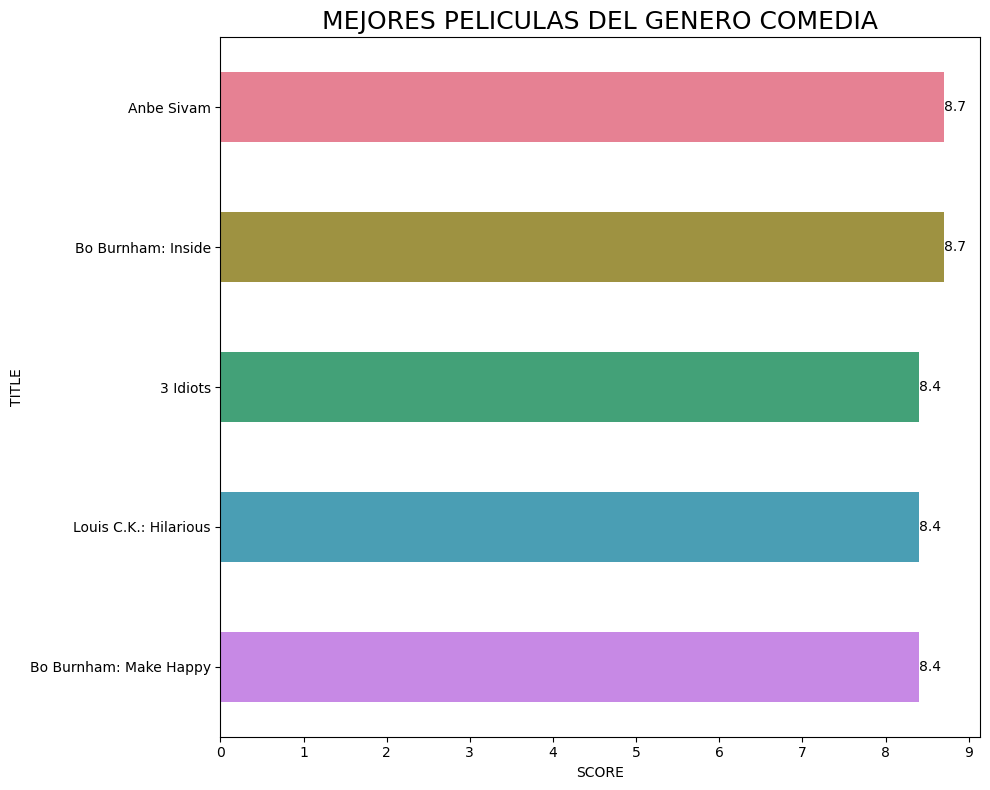

In [21]:
# LLamamos la funcione que definimos celdas atras.
plot = grafico_barplot(
    df = top_drama_movies.head(5),
    x_lenght = 10,
    y = "TITLE",
    x = "SCORE",
    title="MEJORES PELICULAS DEL GENERO COMEDIA"
);


# Cambiamos los tickers del eje X
plt.xticks(
    ticks = np.arange(0, 10),
    labels = np.arange(0, 10) 

);

# agreagar anotaciones a cada barra
annot_bar(plot, {"numerico": 0});


## 2.7 ¿Cuál es la película más recientemente lanzada en el dataset?

Peliculas más recientes, buscaremos por el años **20222**

In [22]:
movies_2022 = df_best_movies_netflix[["TITLE", "RELEASE_YEAR", "SCORE"]].query("RELEASE_YEAR == 2022").sort_values(by="SCORE", ascending=False)
movies_2022

,TITLE,RELEASE_YEAR,SCORE
58,Dasvi,2022,8.0
246,Badhaai Do,2022,7.3
265,The Tinder Swindler,2022,7.2
325,Gangubai Kathiawadi,2022,7.0
385,Radhe Shyam,2022,6.9


Graficamos la peliculas del 2022, y mostramos su puntuacion.

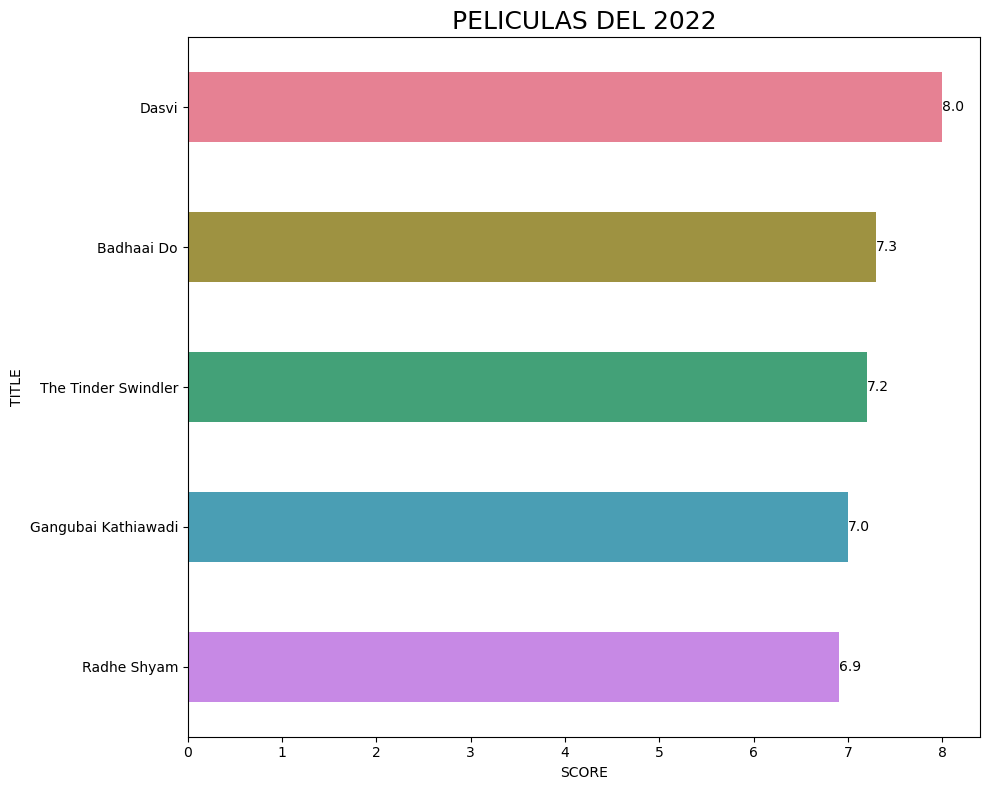

In [23]:
annot_bar(
    grafico_barplot(movies_2022, y="TITLE", x="SCORE", title="PELICULAS DEL 2022"),
    {"numerico": 0}
);

## 2.8 ¿Cuáles son las películas con un numero de votos de 500.000 hasta 1.000.000 ?

Peliculas con el mayor numero de votos

In [24]:
most_voted_movies = df_best_movies_netflix[["TITLE", "NUMBER_OF_VOTES", "SCORE"]].query("NUMBER_OF_VOTES > 500000 and NUMBER_OF_VOTES < 1000000").sort_values(by="SCORE", ascending=False)
most_voted_movies

,TITLE,NUMBER_OF_VOTES,SCORE
16,Taxi Driver,795222,8.3
19,Full Metal Jacket,723306,8.3
28,Monty Python and the Holy Grail,530877,8.2
49,Into the Wild,611379,8.1
35,How to Train Your Dragon,719717,8.1
65,Casino Royale,644336,8.0
64,The Bourne Ultimatum,627009,8.0
76,The Imitation Game,748654,8.0
63,Her,586679,8.0
75,Blade Runner 2049,539864,8.0


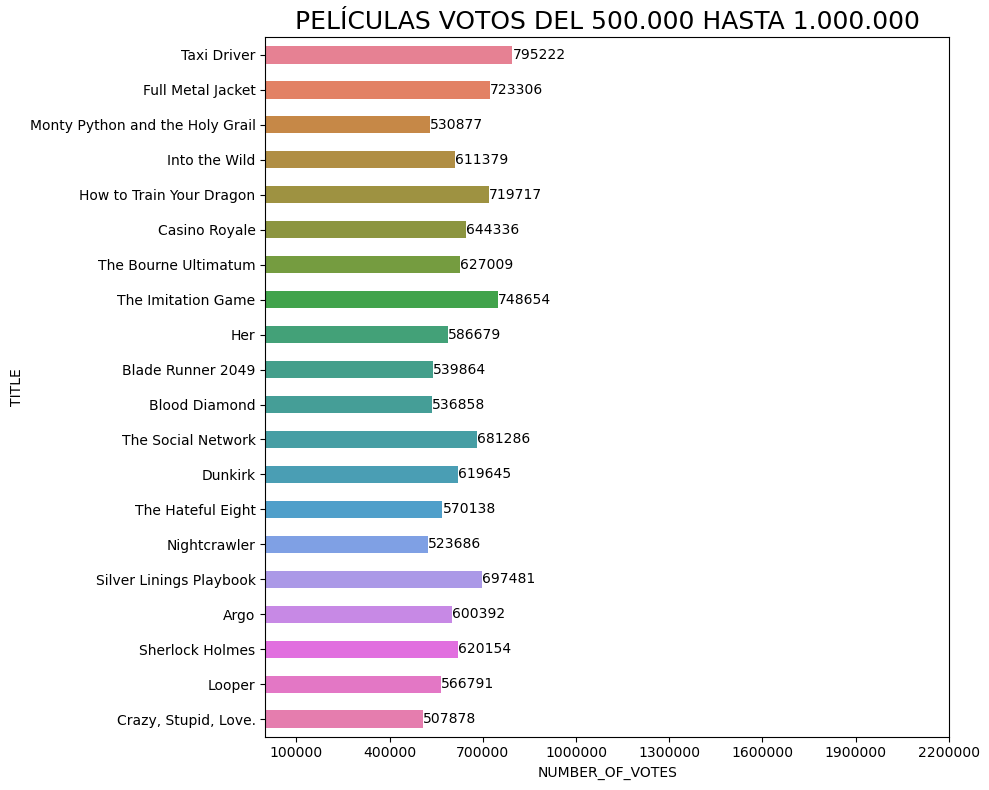

In [25]:

annot_bar(
    grafico_barplot(df= most_voted_movies, y = "TITLE", x = "NUMBER_OF_VOTES", title="películas votos del 500.000 hasta 1.000.000".upper()),
    {"texto":0}


);


plt.xticks(
    ticks = np.arange(100000, 2500000, 300000),
    labels = np.arange(100000, 2500000, 300000)
);

## 2.9 ¿Cuál ha sido la película más votada en cada género principal en cada año desde el año de lanzamiento hasta la actualidad?

/tmp/ipykernel_1089798/2961543038.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(figsize=(x_lenght, y_height), tight_layout=True)


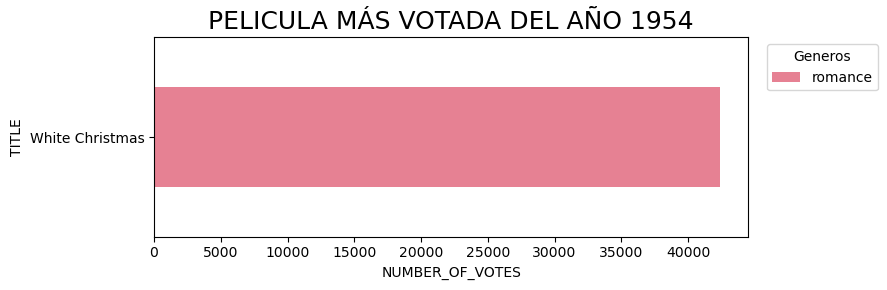

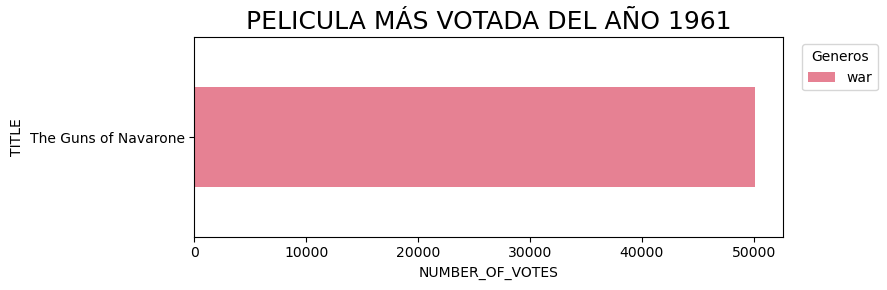

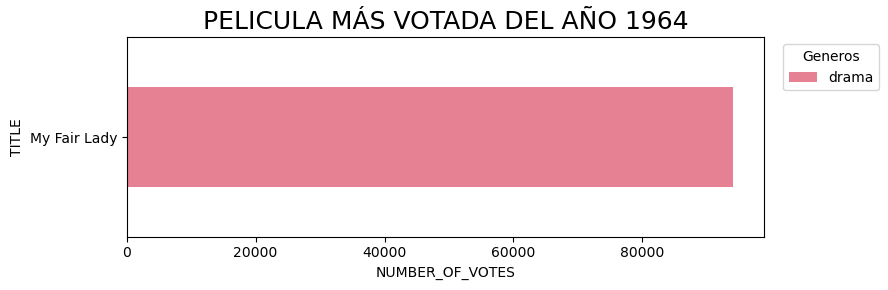

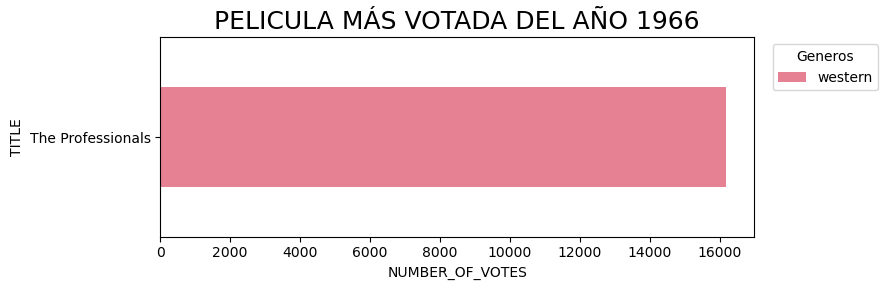

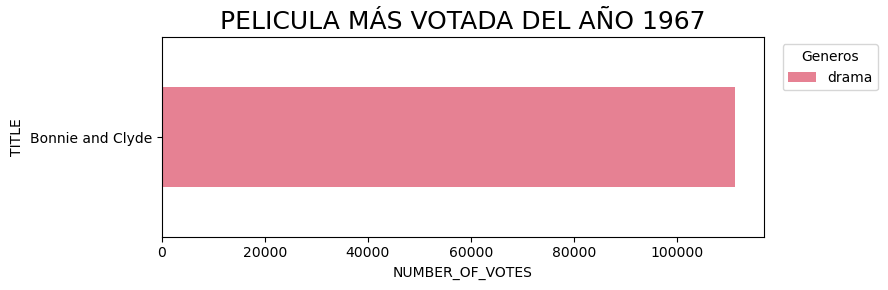

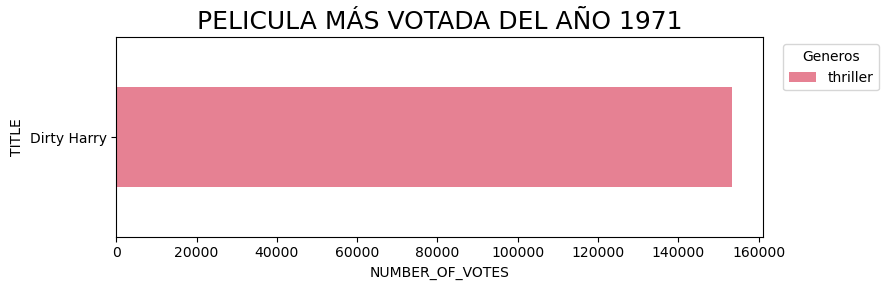

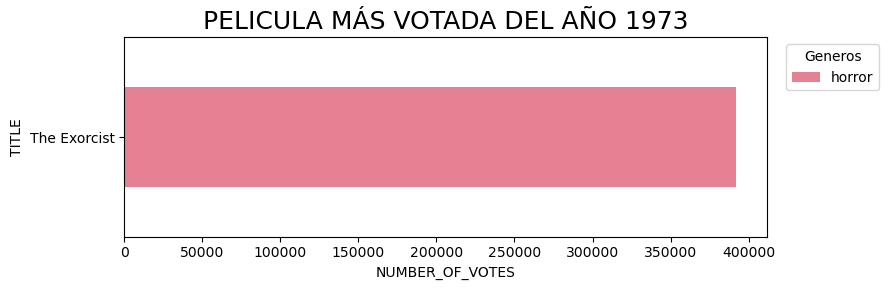

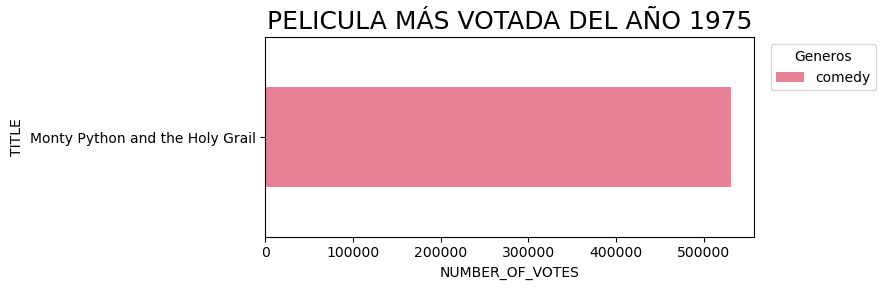

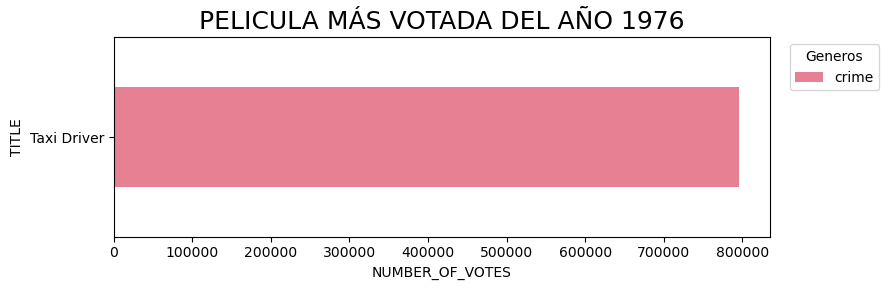

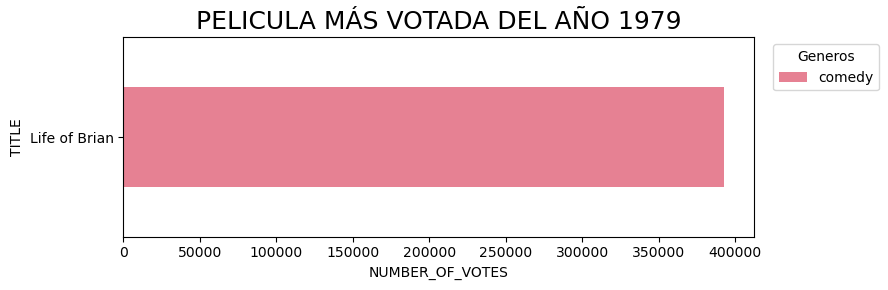

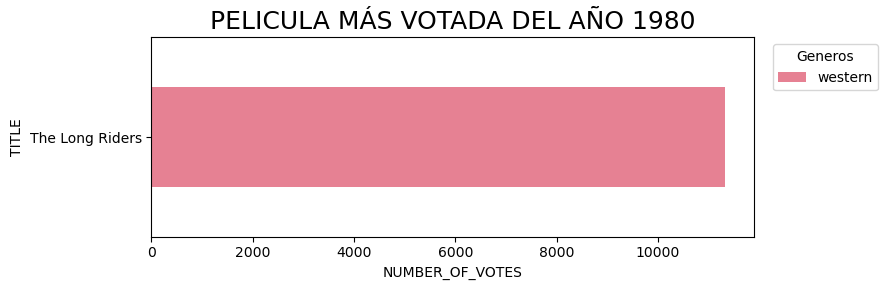

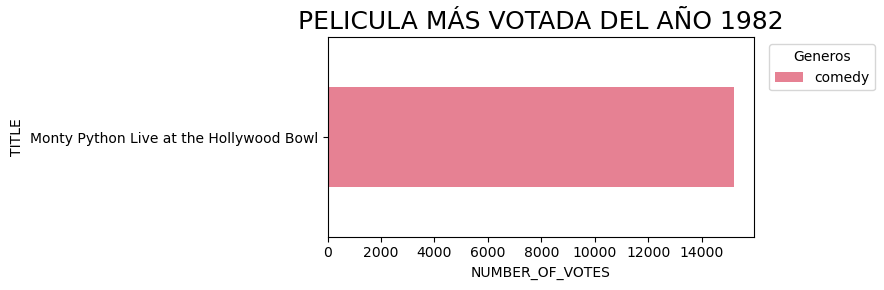

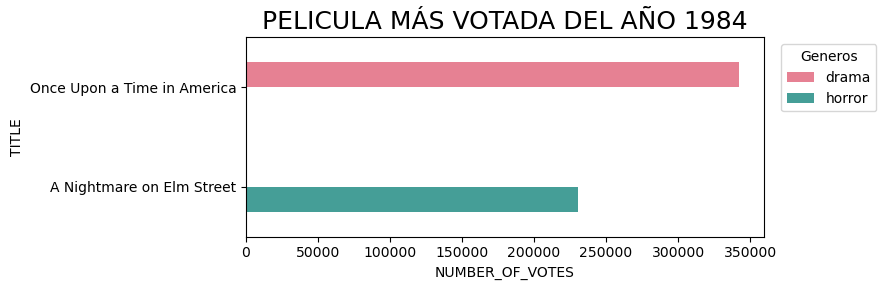

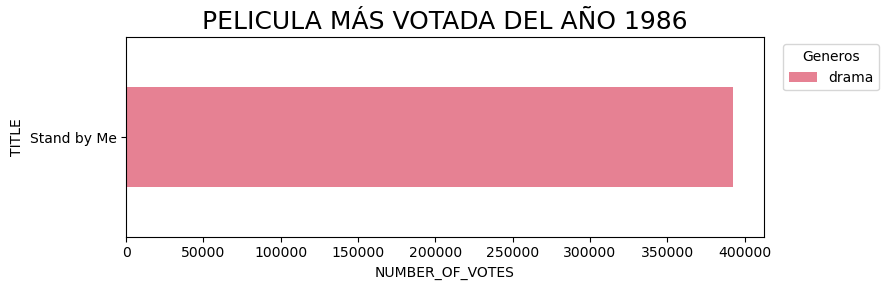

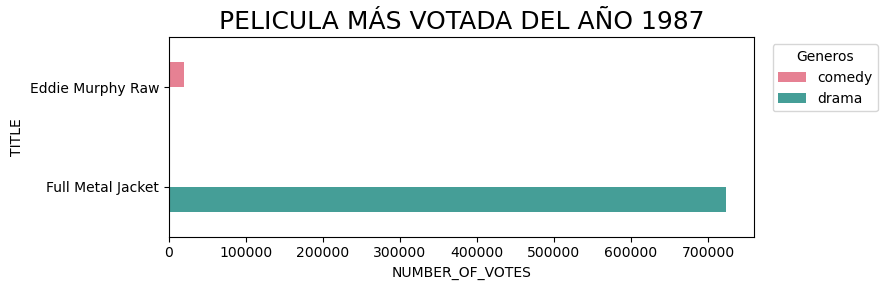

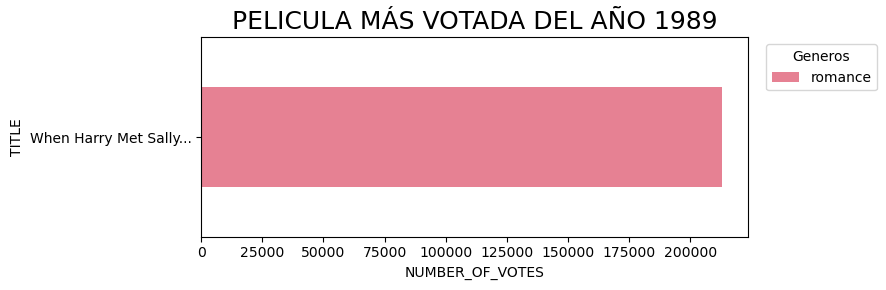

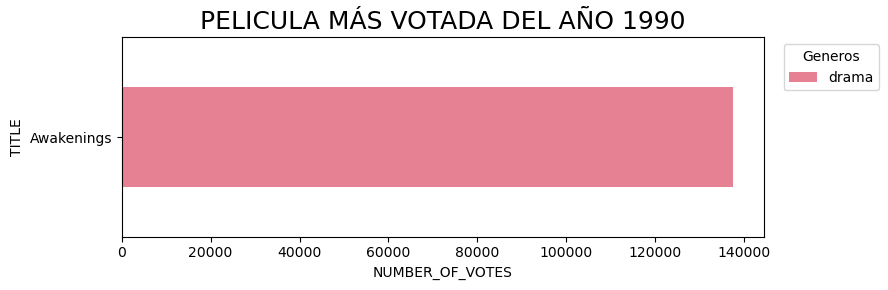

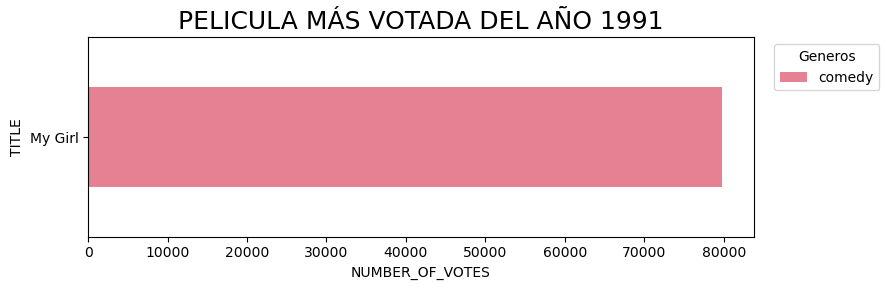

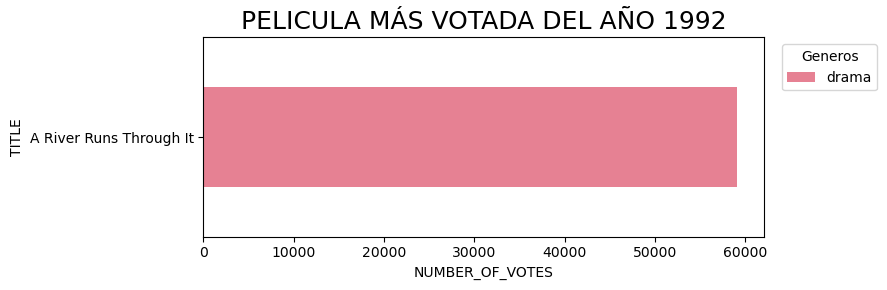

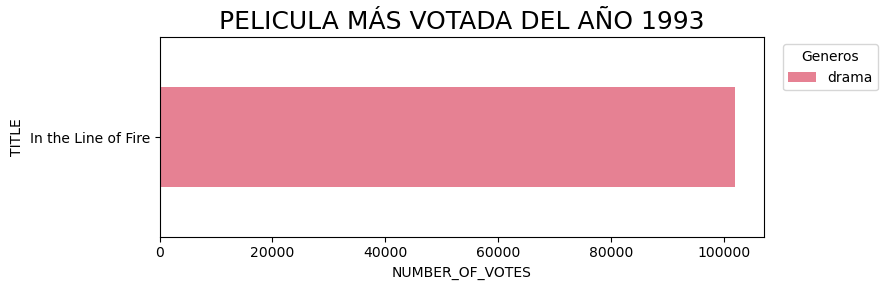

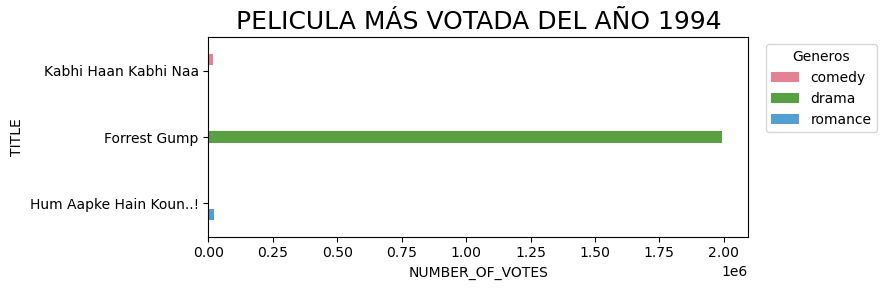

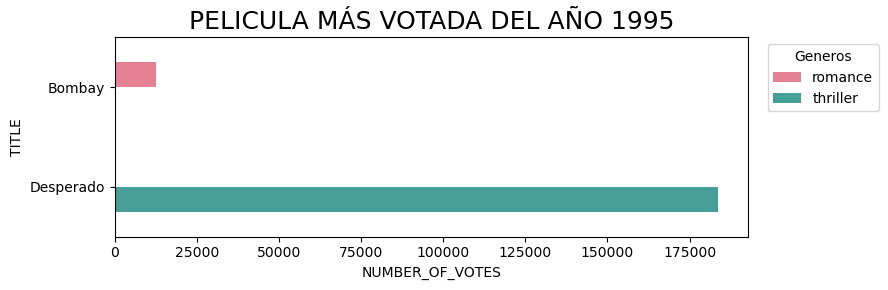

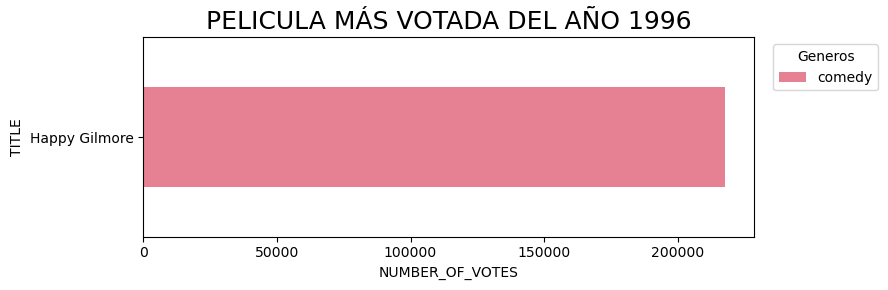

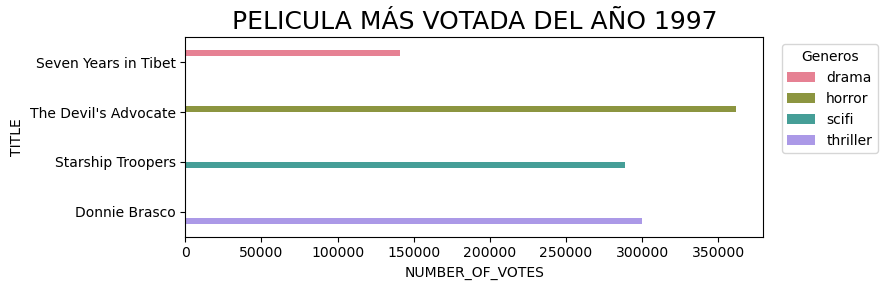

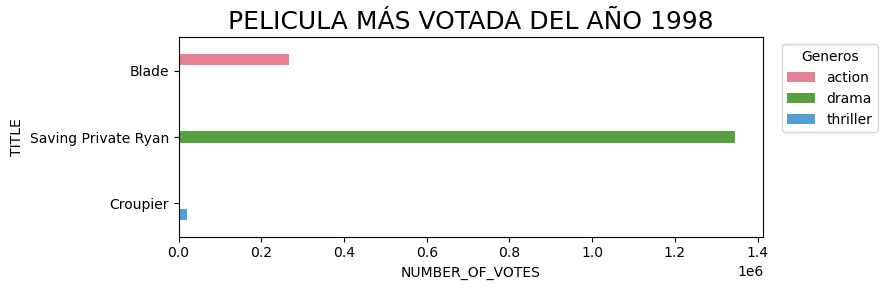

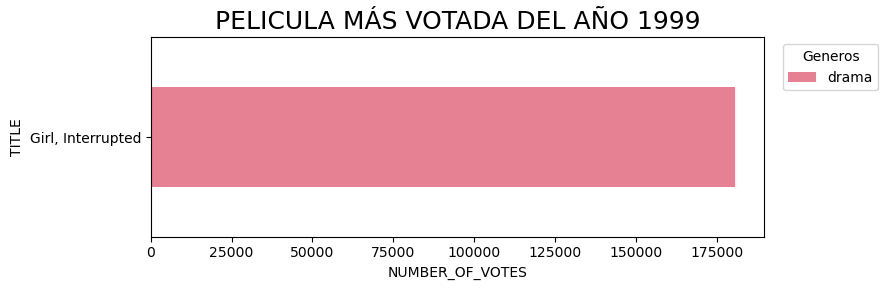

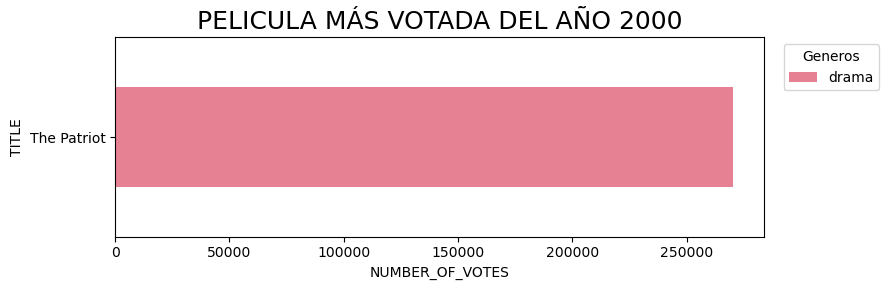

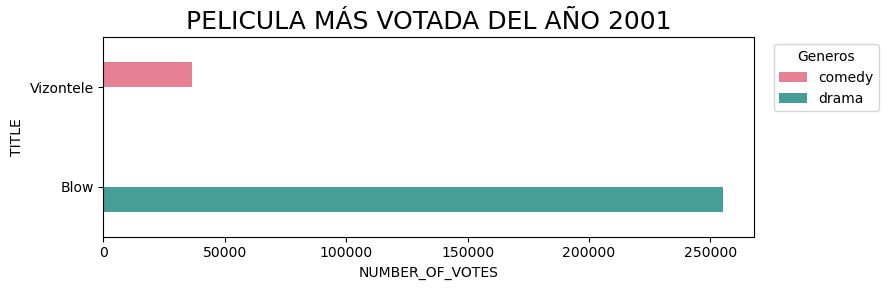

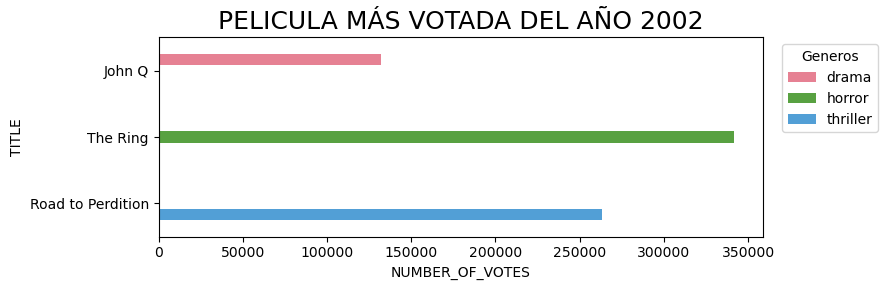

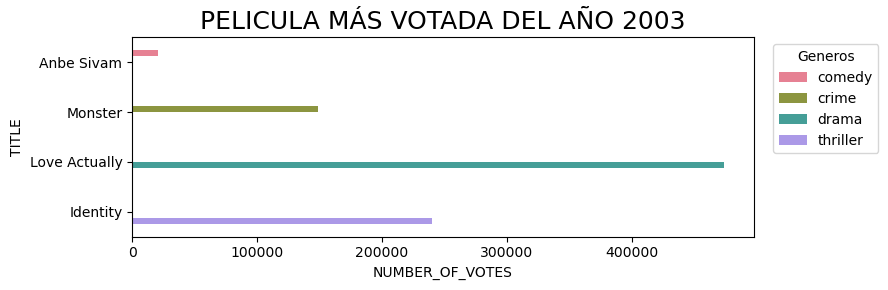

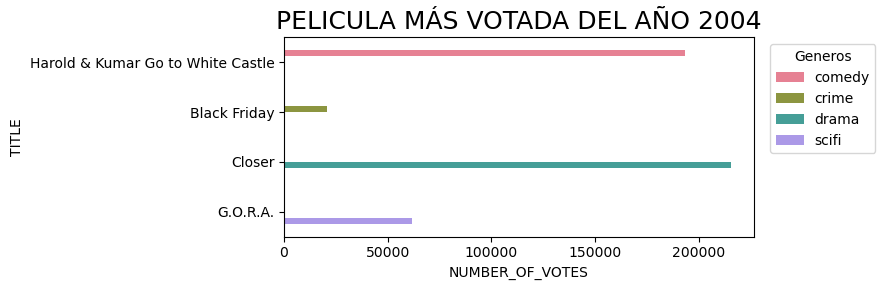

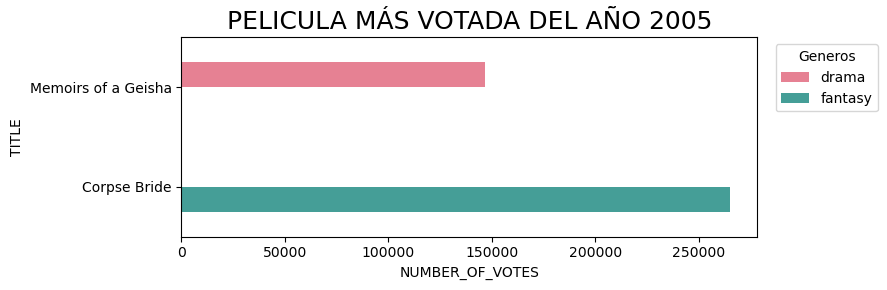

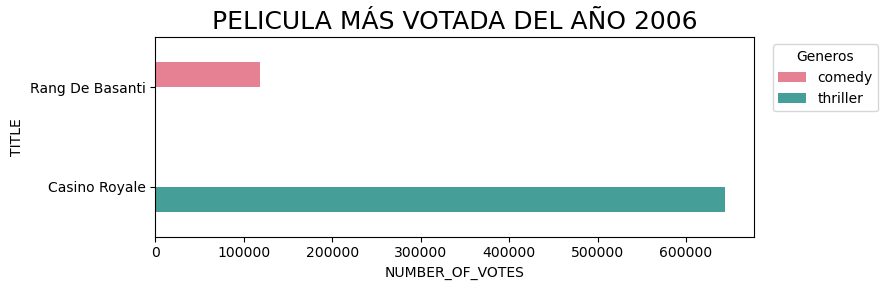

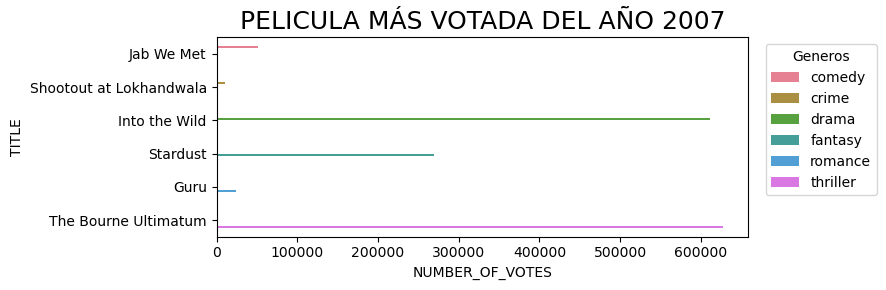

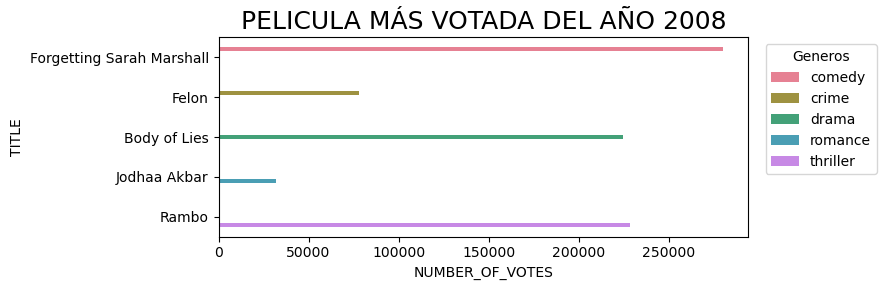

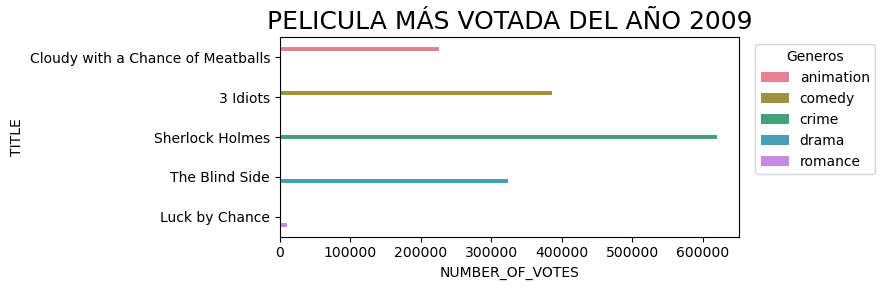

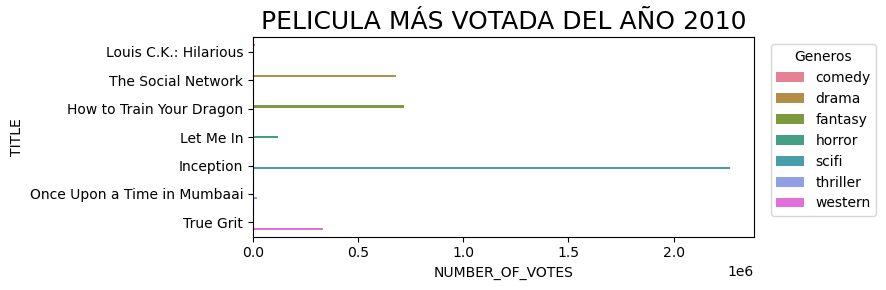

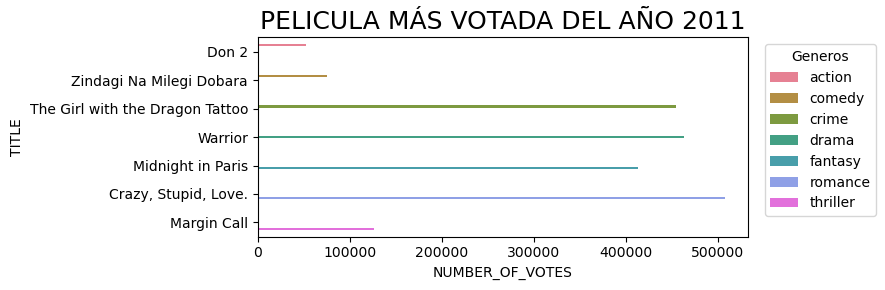

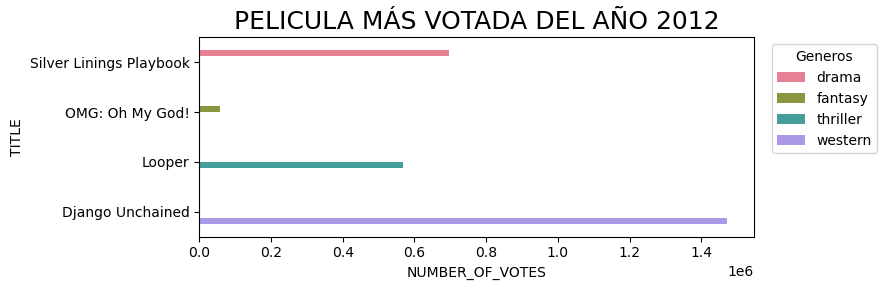

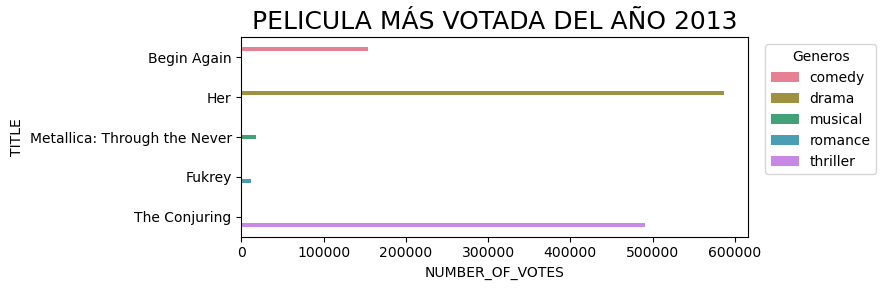

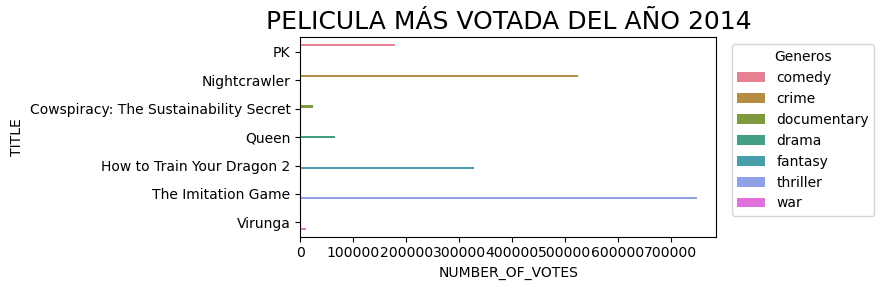

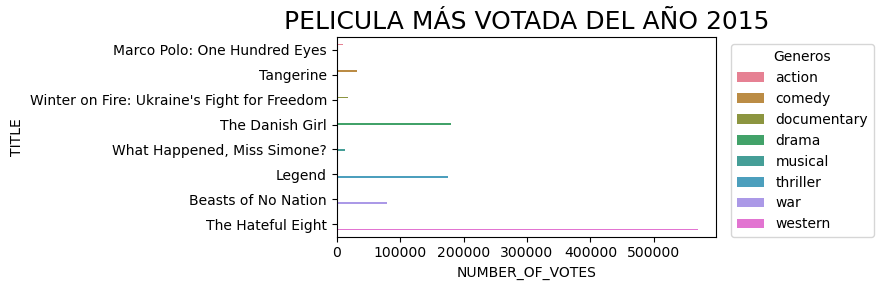

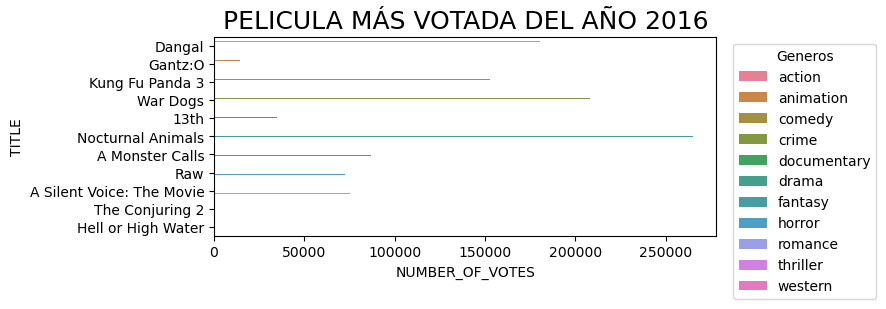

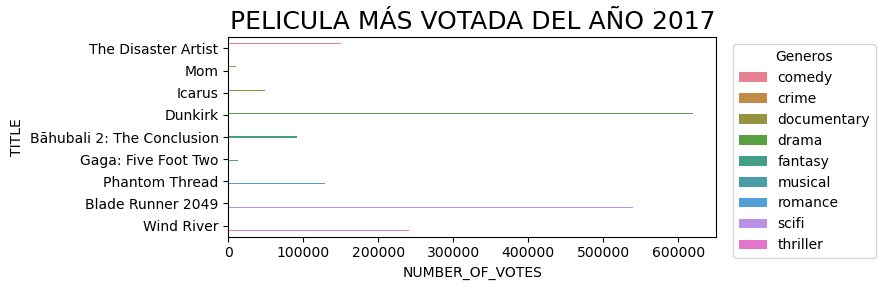

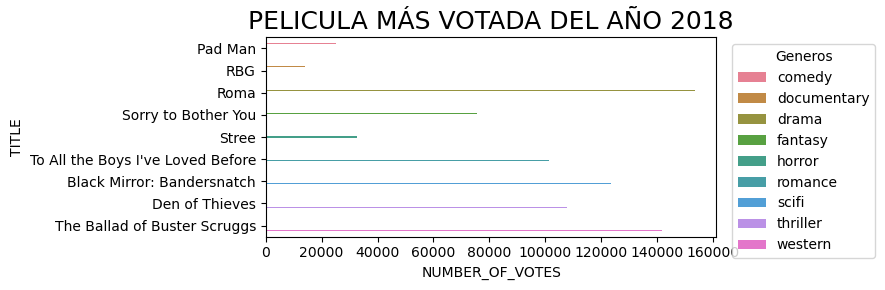

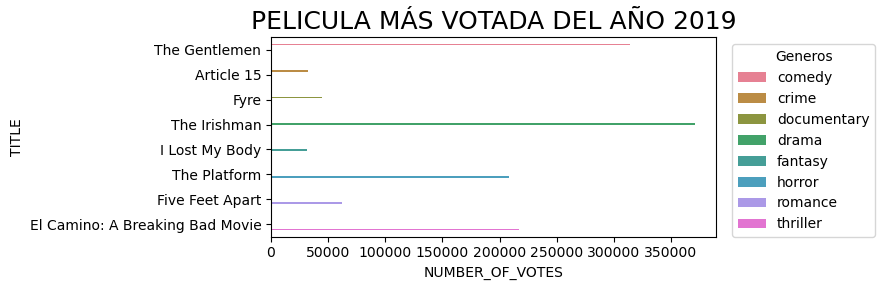

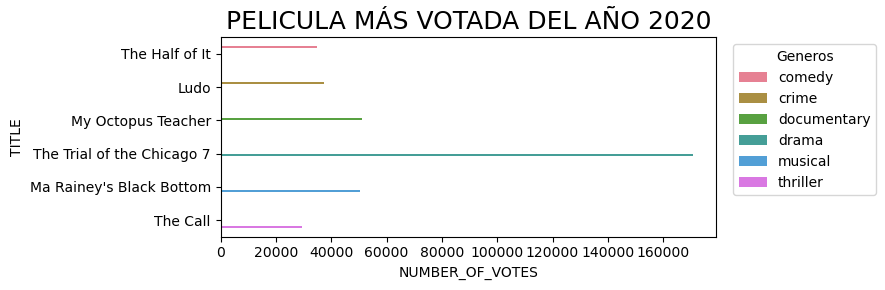

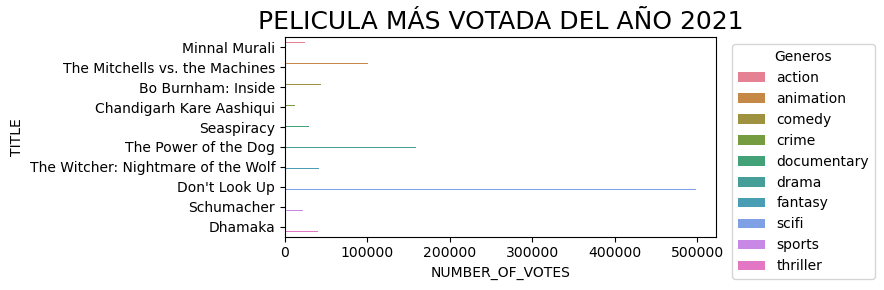

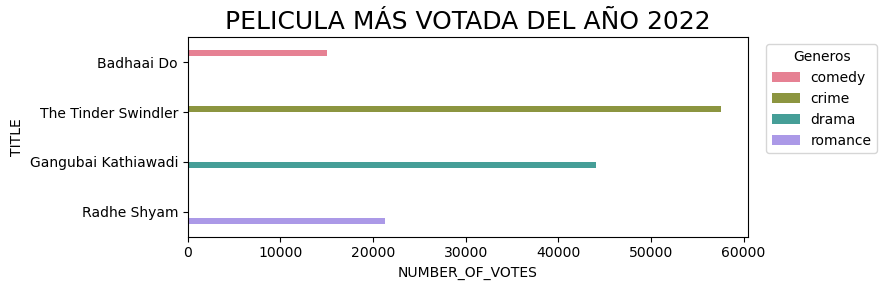

In [157]:
# Agrupar DataFrame por año y género principal
grouped = df_best_movies_netflix.groupby(["RELEASE_YEAR", "MAIN_GENRE"])

# Obtener índice de fila con mayor cantidad de votos en cada grupo
most_voted_index = grouped["NUMBER_OF_VOTES"].idxmax()

# Seleccionar fila con mayor cantidad de votos en cada grupo.
most_voted_title = df_best_movies_netflix.loc[most_voted_index, ["TITLE", "RELEASE_YEAR", "NUMBER_OF_VOTES","MAIN_GENRE"]]

# Mostrar resultados
most_voted_title

# grafico de barras
try:
    for year in most_voted_title["RELEASE_YEAR"].unique():
        grafico_barplot(
            df = most_voted_title.query(f"RELEASE_YEAR == {year}"),
            x = "NUMBER_OF_VOTES",
            y = "TITLE",
            title = f"PELICULA MÁS VOTADA DEL AÑO {year}",
            hue = "MAIN_GENRE",
            y_height = 3,
            x_lenght = 9
        );

        #  Agregar leyendas desde le diccionario y cambiar su ubicacion
        plt.legend(title = "Generos", bbox_to_anchor=(1.02, 1), loc="upper left");
except Exception:
    pass

## 2.10 ¿Cuál ha sido el género principal más popular en cada año desde el año de lanzamiento hasta la actualidad en función del número de votos recibidos?

1. Creamos un Dataframe, este almacenara los **genros con más votos desde 1954 al 2022.**

In [30]:
df_genres_grouped = df_best_movies_netflix.groupby(["RELEASE_YEAR", "MAIN_GENRE"],as_index = False)["NUMBER_OF_VOTES"].max()

2. Itereamos los años del DataFrame que creamos y **almacenamos el ´idxmax()´** del genero con más votos por año.


In [32]:
max_index = [df_genres_grouped.query(f"RELEASE_YEAR == {year}")["NUMBER_OF_VOTES"].idxmax() for year in df_genres_grouped["RELEASE_YEAR"].unique()]

 3. Ubicamos en DataFrame el **genro más votado por año** a partir del **indice.**

In [33]:
df_genres_grouped = df_genres_grouped.loc[max_index, :]

4. Mostrar por pantalla las **5 primeras filas** del DataFrame de los **generos más votados por años.**

In [34]:
df_genres_grouped.head()

,RELEASE_YEAR,MAIN_GENRE,NUMBER_OF_VOTES
0,1954,romance,42373
1,1961,war,50150
2,1964,drama,94121
3,1966,western,16168
4,1967,drama,111189


5. Graficar el DataFrame con un grafico de barras de Seaborn.

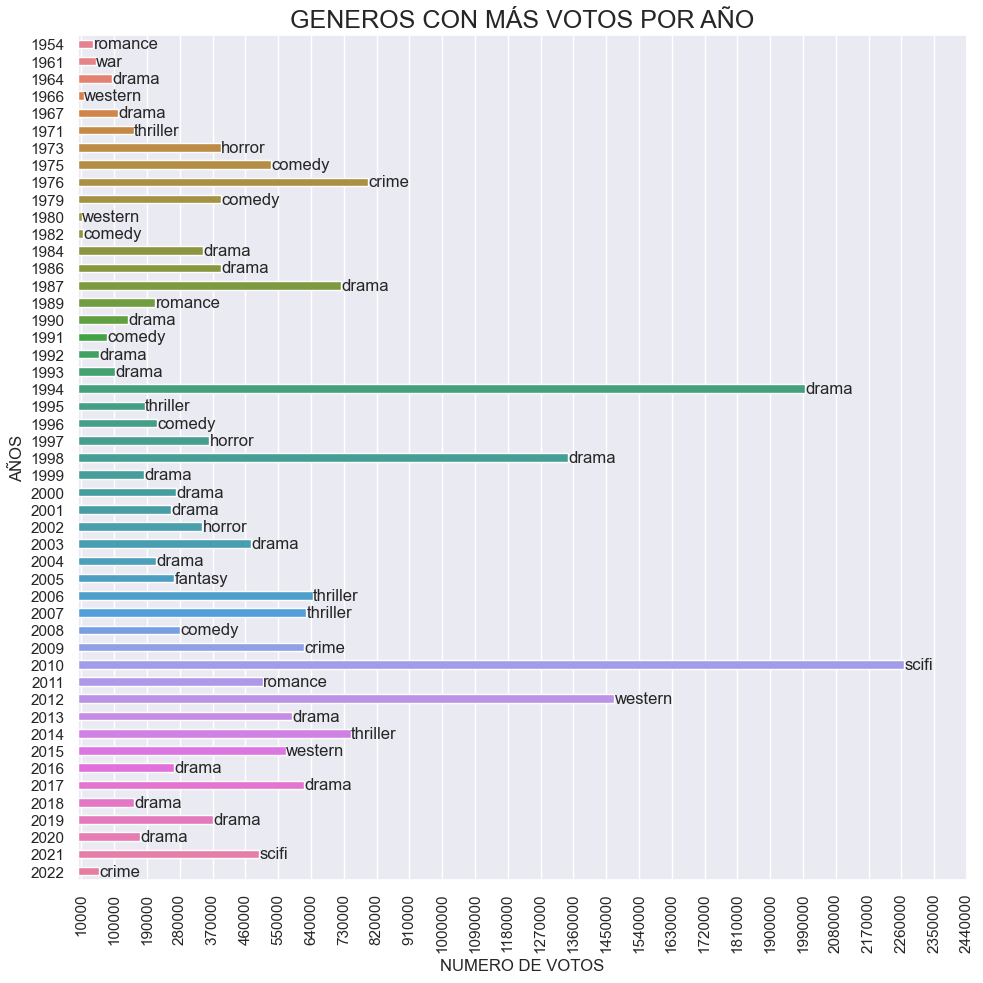

In [164]:
# Crear el gráfico de barras apiladas con barras horizontales
g = grafico_barplot(
    x = "NUMBER_OF_VOTES",
    y = "RELEASE_YEAR",
    orient = 'h',
    df = df_genres_grouped,
    y_height =10,
    x_lenght = 10,
    title = "GENEROS CON MÁS VOTOS POR AÑO"


)

# Obtener la anchura de cada barra
bar_widths = df_genres_grouped['NUMBER_OF_VOTES'].values

# Obtener la anchura y la posición y de cada barra
for i, bar in enumerate(g.containers[0]):
    bar_width = bar.get_width()
    bar_y = bar.get_y() + bar.get_height()/2
    genre = df_genres_grouped['MAIN_GENRE'].iloc[i]
    
    # Comprobar si las coordenadas son números finitos
    if np.isfinite(bar_y) and np.isfinite(bar_width):
        # Dibujar el nombre del género en la posición deseada
        plt.text(bar_width + 1000, bar_y, genre, va='center')


# agregar nuevos tickers en el eje X
g.set_xticks(
    ticks = np.arange(10000, 2500000, 90000),
    labels = np.arange(10000, 2500000, 90000)
);


# Rotar los tickers del eje x
plt.xticks(rotation=90);


# Cambiar el label en el eje X,Y
g.set_ylabel("AÑOS")
g.set_xlabel("NUMERO DE VOTOS");

## 2.11 ¿Cuáles han sido las producciones principales con el mayor número de películas lanzadas en cada género principal en cada año desde el año de      lanzamiento hasta la actualidad? 

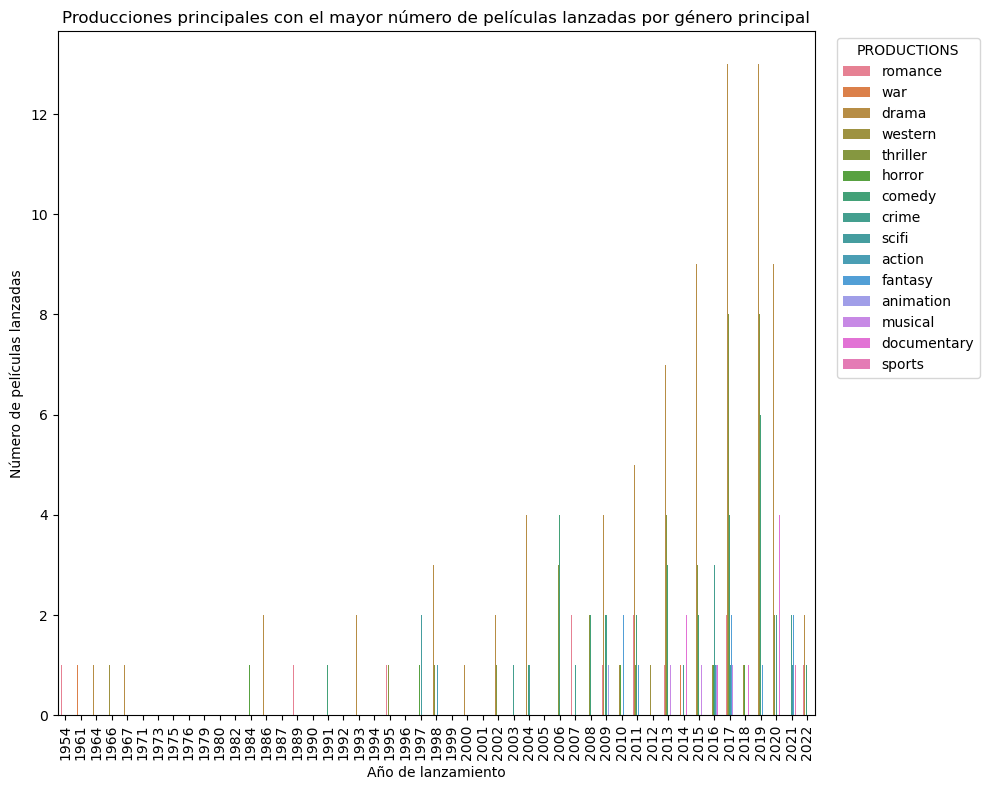

In [153]:
# Agrupar el DataFrame por año y género y contar el número de películas lanzadas de cada grupo
df_grouped = df_best_movies_netflix.groupby(['RELEASE_YEAR', 'MAIN_GENRE']).size().reset_index()

# Renombrar la columna con el número de películas como 'NUMBER_OF_MOVIES'
df_grouped.rename(columns={0: 'NUMBER_OF_MOVIES'}, inplace=True)


# Crear el gráfico de barras apiladas
grafico_barplot(x='RELEASE_YEAR', y='NUMBER_OF_MOVIES', hue='MAIN_GENRE', df=df_grouped)

# Etiquetar los ejes y añadir un título
plt.xlabel('Año de lanzamiento')
plt.ylabel('Número de películas lanzadas')
plt.title('Producciones principales con el mayor número de películas lanzadas por género principal')

# Rotar los tickers del eje x
plt.xticks(rotation=90);


#  Agregar leyendas desde le diccionario y cambiar su ubicacion
plt.legend(title = "PRODUCTIONS", bbox_to_anchor=(1.02, 1), loc="upper left");


## 2.12 ¿Cuál ha sido la producción principal más exitosa en términos de puntuación media en cada género principal?

In [104]:
# Definimos una lista, donde almacenaremos la peliculas.
best_production = []

# Iteramos sobre todos generos.
for i in df_best_movies_netflix["MAIN_GENRE"].unique():
    
    # Agregamos la produccion con mayor puntaje
    best_production.append(
        
        # Seleccionamos la producion con mayor puntaje.
        df_best_movies_netflix.query(f"MAIN_GENRE == '{i}' and SCORE >  SCORE.mean()").head(1))

    
# Unimos todas las peliculas e ignoramos sus indices.
df_best_production = pd.concat(best_production, ignore_index=True)

# Mostramos las mejores producciones por genero.
df_best_production

,TITLE,RELEASE_YEAR,SCORE,NUMBER_OF_VOTES,DURATION,MAIN_GENRE,MAIN_PRODUCTION
0,Inception,2010,8.8,2268288,148,scifi,GB
1,Forrest Gump,1994,8.8,1994599,142,drama,US
2,Django Unchained,2012,8.4,1472668,165,western,US
3,Taxi Driver,1976,8.3,795222,113,crime,US
4,The Imitation Game,2014,8.0,748654,113,thriller,US
5,How to Train Your Dragon,2010,8.1,719717,98,fantasy,US
6,Monty Python and the Holy Grail,1975,8.2,530877,91,comedy,GB
7,When Harry Met Sally...,1989,7.7,212913,96,romance,US
8,The Exorcist,1973,8.1,391942,133,horror,US
9,Dangal,2016,8.4,180247,161,action,IN


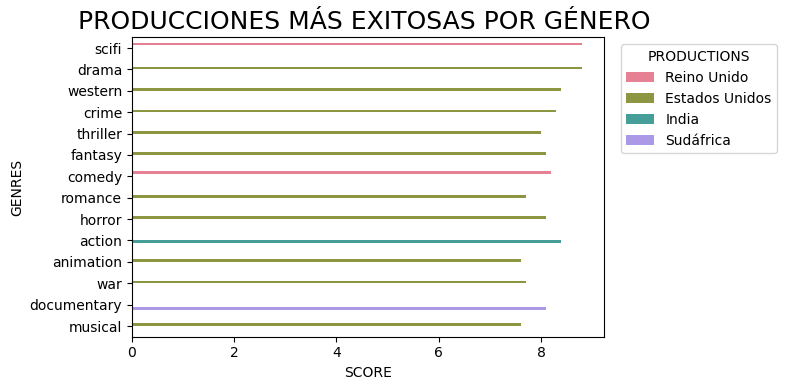

In [155]:
ax = grafico_barplot(
    df = df_best_production,
    y = "MAIN_GENRE",
    x = "SCORE",
    hue = "MAIN_PRODUCTION",
    y_height =4,
    x_lenght = 8,
    title = "producciones más exitosas por género ".upper()

);

# obtenemos las leyendas del gráfico
handles, labels = plt.gca().get_legend_handles_labels()


# creamos el diccionario
abbreviations = {
    "GB": "Reino Unido",
    "US": "Estados Unidos",
    "IN": "India",
    "ZA": "Sudáfrica"
}

#  Agregar leyendas desde le diccionario y cambiar su ubicacion
plt.legend(title = "PRODUCTIONS", handles= handles, labels=abbreviations.values(),  bbox_to_anchor=(1.02, 1), loc="upper left");

# Cambiar el label del eje Y
plt.ylabel("GENRES");


## 2.13 ¿Cuál ha sido el título de la película con la puntuación más alta en cada año desde el año de lanzamiento hasta la actualidad?


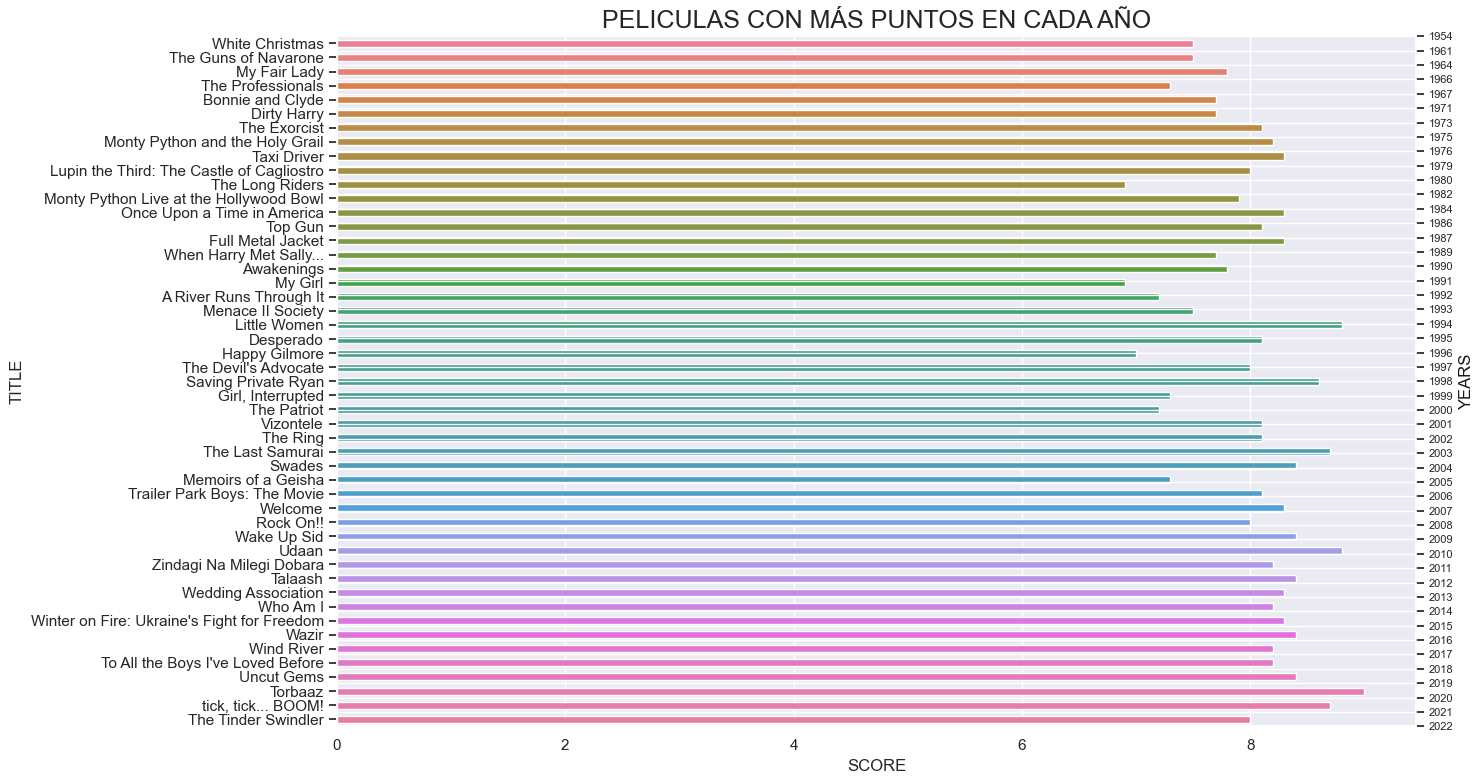

In [165]:
# Itermos por cada años y agregarmos a las lista la pelicula con más votos.
list_popular_movies_of_years = [ df_best_movies_netflix.query(f"RELEASE_YEAR == {year}").max() for year in df_best_movies_netflix["RELEASE_YEAR"].unique() ]

# Creamos un DataFrame con la lista de los generos más votados.
df_popular_movies_of_years = pd.DataFrame(list_popular_movies_of_years).sort_values("RELEASE_YEAR")

# Mostramos por pantalla el dataset
df_popular_movies_of_years

# Agregar Grafico de barra
g = grafico_barplot(
    df = df_popular_movies_of_years,
    y="TITLE",
    x = "SCORE",
    title = "PELICULAS CON MÁS PUNTOS EN CADA AÑO",
    x_lenght = 15,
    y_height = 8
);

# Anotaciones
# annot_bar(g, {"numerico":0});


# Create a second y-axis with a different scale
ax2 = g.twinx()

# Set the limits of the second y-axis
ax2.set_yticks(ticks=range(len(df_popular_movies_of_years["RELEASE_YEAR"])), labels=df_popular_movies_of_years["RELEASE_YEAR"].sort_values(ascending=False))

# Set the size of the tick labels
# ax2.tick_params(labelsize=10)

# Ajustar tamaño de etiquetas del eje Y secundario
ax2.tick_params(labelsize=8)


# Set the y-axis label for the score
ax2.set_ylabel('YEARS', color='k');


## 2.14 ¿Hay alguna relación entre el año de lanzamiento y la puntuación de la película en función del número de votos recibidos?

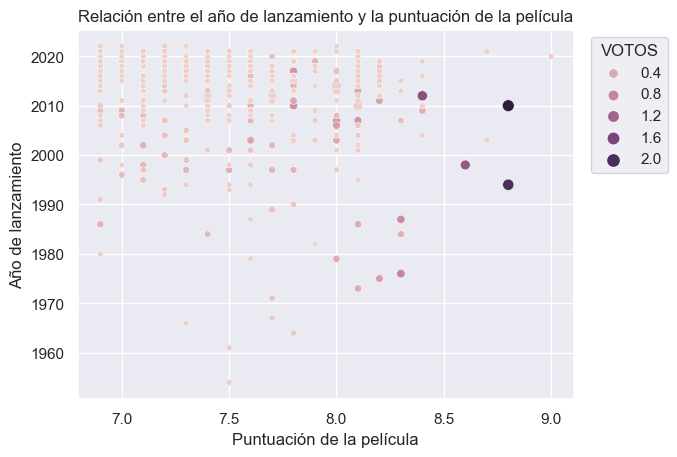

In [196]:
sns.set_theme(style="darkgrid")


sns.scatterplot(hue="NUMBER_OF_VOTES",
                y="RELEASE_YEAR", x="SCORE",
                size="NUMBER_OF_VOTES",
                data=df_best_movies_netflix,
               
               )
      

# Agregar leyendas desde le diccionario y cambiar su ubicacion
plt.legend(title = "VOTOS",  bbox_to_anchor=(1.02, 1), loc="upper left");



# Etiquetar los ejes y añadir un título
plt.ylabel('Año de lanzamiento')
plt.xlabel('Puntuación de la película')
plt.title('Relación entre el año de lanzamiento y la puntuación de la película')

# Mostrar el gráfico
plt.show()
